# Lab06: Logistic Regression and Evaluation Metrics

---

111062697 吳律穎

### 1. Loading of dataset

In [3]:
import pandas as pd
import numpy as np
from lab04lib import *
%matplotlib inline

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


In [4]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)

In [5]:
data = data._get_numeric_data()

### 2. Splitting of dataset to training and testing data

In [6]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

##### standardization

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 3. Building of a self-designed Logistic Regression model

In [34]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        epsilon = 1e-15
        output = np.maximum(epsilon, np.minimum(1 - epsilon, output))
        return -np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))


    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        net_input = self.net_input(X)
        output = self.activation(net_input)
        return output >= 0.5

### 4. Plotting the loss curve.

[253.41446971034446, 280.09900455162585, 193.79227681028024, 335.78272104532834, 436.6285385339852, 496.17274859356235, 218.80016653994198, 178.74056621747957, 165.15085840049886, 193.69307987642264, 173.6877687387759, 201.37995876889897, 165.90251576419925, 178.63451981742367, 146.23745342150184, 153.42834434904853, 129.99124381710712, 136.05008731672606, 119.26226329548861, 124.63992197691536, 112.1312988786496, 117.24913944850388, 107.3852204296548, 112.57171069146523, 104.34342329645263, 109.68607459987729, 102.3462838037103, 107.71123621996054, 100.74385790872981, 105.86852265334124, 99.02795555919388, 103.66366172694937, 96.96660854462158, 100.99994843103624, 94.62417184319035, 98.1000053603309, 92.23226747312543, 95.28425806313477, 90.01370655056093, 92.77879686793113, 88.08160646532588, 90.65413754674879, 86.43728195013773, 88.86308525368602, 85.01567129794131, 87.30499412471659, 83.73183557711772, 85.876395782043, 82.51224603466474, 84.49995704670411, 81.31004217870556, 83.134

Text(0.5, 1.0, 'Loss Curve')

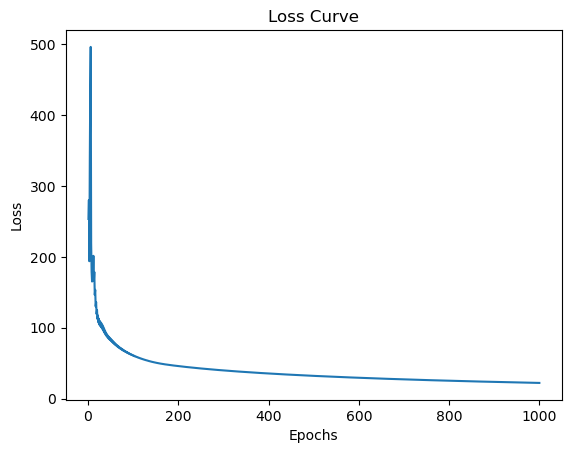

In [43]:
import matplotlib.pyplot as plt

lr = LogisticRegression(eta=0.005, n_epoch=1000)
lr.fit(X_train_std, y_train)
loss_val = lr.cost_

plt.plot(range(1, len(loss_val)+1), loss_val)

print(loss_val)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')


### 5. Plotting of the confusion matrix.

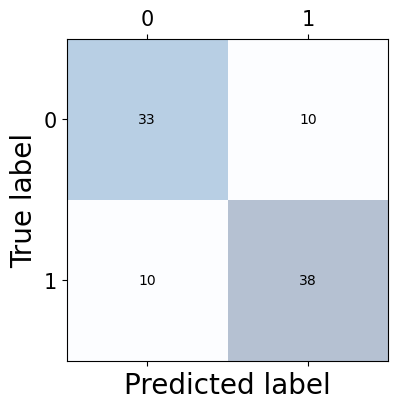

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test_std)


confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-2.png', dpi=300)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

### 6. Computing the F1-score of this confusion matrix. 

In [55]:
from sklearn.metrics import f1_score
print(f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

0.7674418604651162
